In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing casia 3D dataset
Xtrain=[]
Xtest=[]
ytrain=[]
ytest=[]
for i in range(0,123):
    d=str(i+1)+'/'
    imglist=os.listdir(d)
    l=len(imglist)
    for j in range(l):
        im=cv2.imread(d+imglist[j],)
        if j==0 or j==l-1:
            Xtest.append(im)
            ytest.append(i)
        else:
            Xtrain.append(im)
            ytrain.append(i)

Xtrain=np.array(Xtrain)
Xtest=np.array(Xtest)
ytrain=np.array(ytrain)
ytest=np.array(ytest)

Xtrain=Xtrain/255
Xtest=Xtest/255

Xtrain.shape

(4305, 100, 100, 3)

In [3]:
Xtest.shape

(246, 100, 100, 3)

In [4]:
ytrain.shape

(4305,)

In [5]:
ytest.shape

(246,)

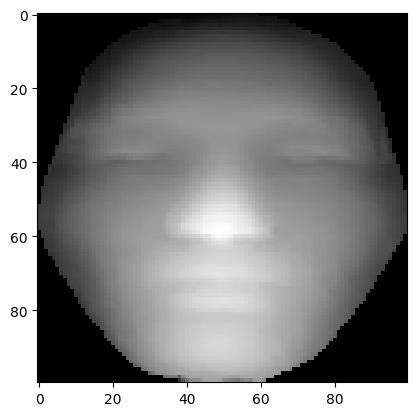

In [6]:
plt.imshow(Xtrain[4304])

In [7]:
ytrain[4304]

122

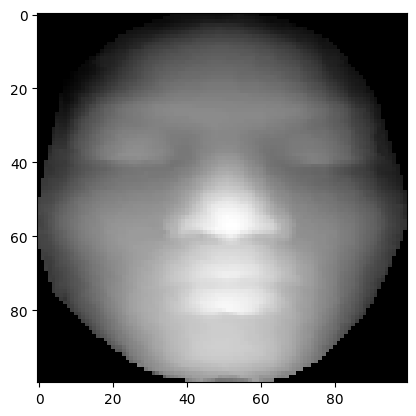

In [8]:
plt.imshow(Xtrain[245])

In [9]:
ytest[245]

122

In [10]:
import tensorflow as tf
from tensorflow.keras import Sequential
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.layers import Input,Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.applications import InceptionResNetV2

In [24]:
base_model=InceptionResNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(100,100,3)))

In [25]:
for layer in base_model.layers[:-10]:
    layer.trainable=False

In [26]:
model=Sequential()

model.add(base_model)

model.add(Flatten())

model.add(Dense(250,activation='relu'))

model.add(Dense(123,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 1, 1, 1536)        54336736  
 ional)                                                          
                                                                 
 flatten_2 (Flatten)         (None, 1536)              0         
                                                                 
 dense_4 (Dense)             (None, 250)               384250    
                                                                 
 dense_5 (Dense)             (None, 123)               30873     
                                                                 
Total params: 54751859 (208.86 MB)
Trainable params: 4545907 (17.34 MB)
Non-trainable params: 50205952 (191.52 MB)
_________________________________________________________________


In [27]:
model.fit(Xtrain,ytrain,epochs=6,validation_data=(Xtest,ytest))

Epoch 1/6
135/135 [==============================] - 253s 2s/step - loss: 4.4245 - accuracy: 0.0790 - val_loss: 3.2744 - val_accuracy: 0.2805
Epoch 2/6
135/135 [==============================] - 220s 2s/step - loss: 3.0674 - accuracy: 0.3059 - val_loss: 1.7091 - val_accuracy: 0.5976
Epoch 3/6
135/135 [==============================] - 221s 2s/step - loss: 2.1911 - accuracy: 0.4808 - val_loss: 1.1642 - val_accuracy: 0.7114
Epoch 4/6
135/135 [==============================] - 220s 2s/step - loss: 1.6919 - accuracy: 0.5914 - val_loss: 1.0211 - val_accuracy: 0.7358
Epoch 5/6
135/135 [==============================] - 221s 2s/step - loss: 1.3158 - accuracy: 0.6715 - val_loss: 0.8673 - val_accuracy: 0.8130
Epoch 6/6
135/135 [==============================] - 221s 2s/step - loss: 1.0260 - accuracy: 0.7347 - val_loss: 0.8096 - val_accuracy: 0.8171


In [28]:
yprob=model.predict(Xtest)
yprob.shape

8/8 [==============================] - 17s 1s/step


(246, 123)

In [29]:
ypred=yprob.argmax(axis=1)
ypred.shape

(246,)

In [30]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       0.67      1.00      0.80         2
           5       1.00      0.50      0.67         2
           6       0.50      1.00      0.67         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       1.00      0.50      0.67         2
          12       1.00      1.00      1.00         2
          13       0.67      1.00      0.80         2
          14       1.00      0.50      0.67         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00    

d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[]

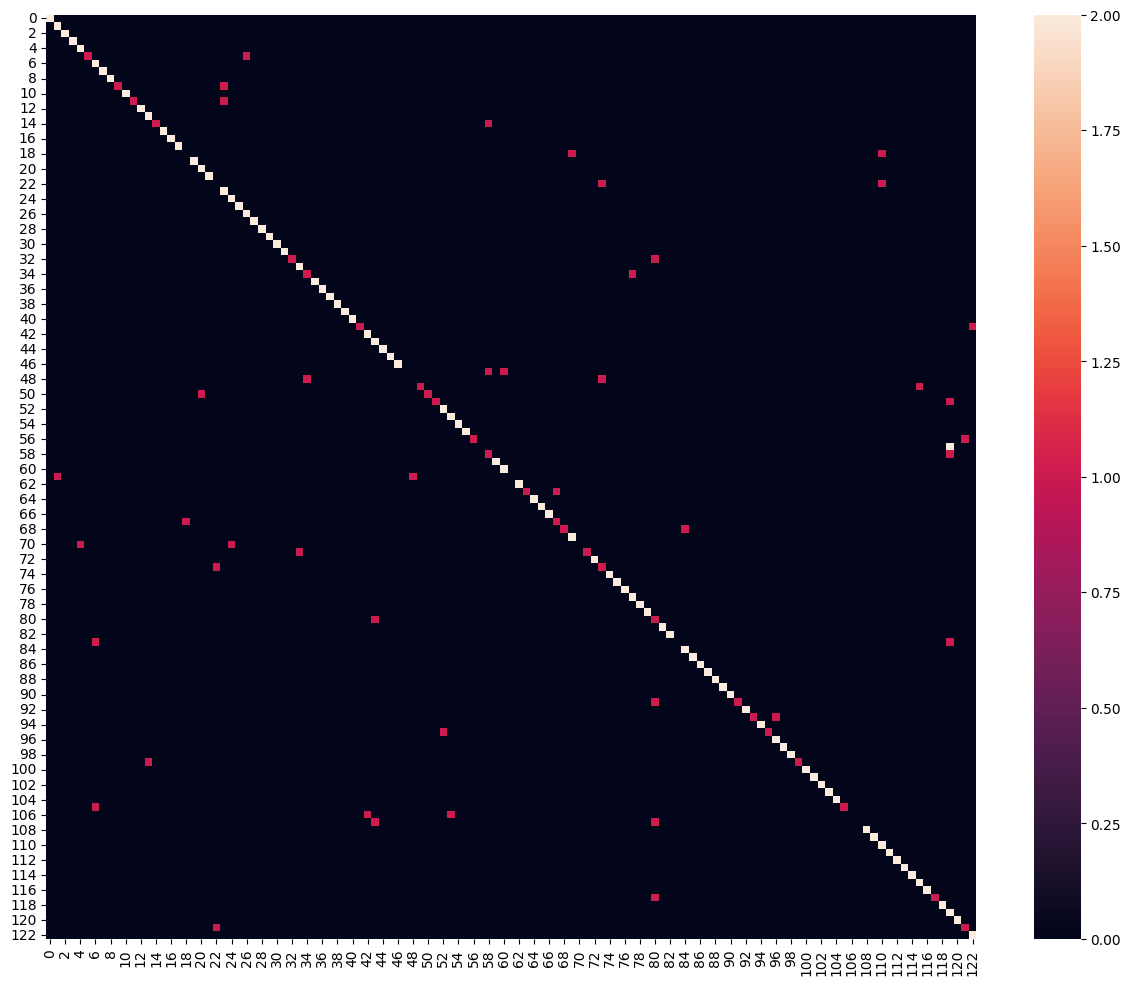

In [31]:
conm=confusion_matrix(ytest,ypred)
plt.figure(figsize=(15,12))
sns.heatmap(data=conm)
plt.plot()